# Social_Network_Ads Project Practice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [5]:
df.drop('User ID',axis=1,inplace=True)

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


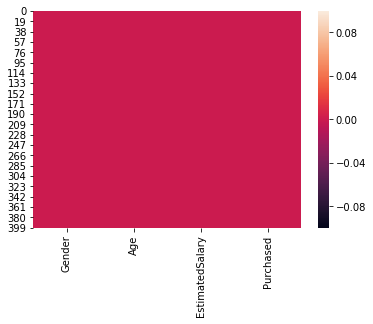

In [8]:
sns.heatmap(df.isnull())

In [9]:
sex = pd.get_dummies(df['Gender'],drop_first=True)

In [10]:
sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [11]:
df.drop('Gender',axis=1,inplace=True)

In [14]:
data = pd.concat([df,sex],axis=1)

In [15]:
data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


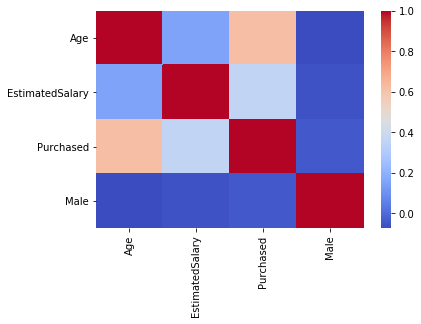

In [23]:
sns.heatmap(data.corr(),cmap='coolwarm')

In [24]:
data.drop('Male',axis=1,inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3)
memory usage: 9.4 KB


In [29]:
# scale the data 

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
ss = StandardScaler()

In [33]:
scale_arr = ss.fit_transform(data.drop('Purchased',axis=1))

In [34]:
scale_arr

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [35]:
X = pd.DataFrame(data=scale_arr,columns=data.columns[:-1])

In [37]:
X.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [38]:
y = data['Purchased']

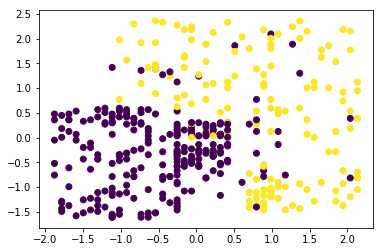

In [45]:
plt.scatter(scale_arr[:,0],scale_arr[:,1],c=y)

In [46]:
narr = data.values

In [48]:
narr.shape

(400, 3)

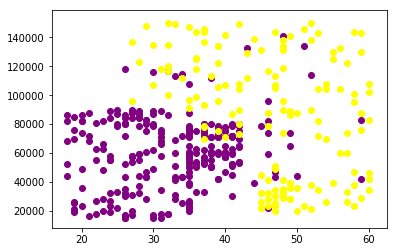

In [53]:
plt.scatter(narr[y==0,0],narr[y==0,1],color='purple')
plt.scatter(narr[y==1,0],narr[y==1,1],color='yellow')

In [54]:
X.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [55]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 11 to 30
Data columns (total 2 columns):
Age                280 non-null float64
EstimatedSalary    280 non-null float64
dtypes: float64(2)
memory usage: 6.6 KB


In [70]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 50 to 8
Data columns (total 2 columns):
Age                120 non-null float64
EstimatedSalary    120 non-null float64
dtypes: float64(2)
memory usage: 2.8 KB


In [71]:
len(y_train)

280

In [72]:
len(y_test)

120

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
cl = GaussianNB()

In [75]:
cl.fit(X_train,y_train)

GaussianNB(priors=None)

In [76]:
ypred = cl.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(ypred, y_test)

array([[76,  6],
       [ 5, 33]], dtype=int64)